# COMPUTING MOLECULAR DESCRIPTORS

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset.csv')
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,991,3423840.0,CNC1=C(N=CC=C1)C=NNC(=S)N,30.0,0
1,2104,3157186.0,CCCC1=C(C2=NC3=CC=CC=C3N2C(=C1)NCCOCCO)C#N,0.0,0
2,838,15945344.0,CCN(CC)C1=CC(=[N+]2CCCC2)CC(C1)(C)C.[I-],45.0,1
3,630,6603246.0,CCCCN1C2=C(CCC2)C(=N)C3=C1CCC3.I,61.0,1
4,1579,2963165.0,CC1=CC=C(C=C1)N2CC(CC2=O)C(=O)NC3=NC4=C(S3)C=C...,0.0,0
...,...,...,...,...,...
2099,946,16746116.0,CC[C@H](CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC...,36.0,1
2100,632,1150803.0,CC(C)(C)C1=CC=C(C=C1)C(=O)NC2=CC=C(C=C2)C(=O)N...,61.0,1
2101,2137,984185.0,C1COC2=C(O1)C=CC(=C2)C(=O)CSC3=NC4=C(C=NN4)C(=...,0.0,0
2102,1743,3220816.0,CN(C)C1=CC=C(C=C1)NC(=O)CN2CCC(CC2)NC(=O)C3CCCCC3,0.0,0


In [2]:
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools, Descriptors, Lipinski
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [4]:
#function to calculate Morgan fps
def morgan_fps(data):
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in data]  # Calculate Morgan fingerprints for each molecule
  fp_array = [np.array(fp) for fp in fps]   # Convert fingerprints to numpy array
  column_names = ["morgan_" + str(i) for i in range(len(fp_array[0]))]
  return pd.DataFrame(fp_array, columns = column_names)


# DATA PROCESSING AND SPLITTING

In [5]:
d1 = morgan_fps(mols)
X = pd.concat([d1], axis = 1)
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df["Activity_outcome"]
y

0       0
1       0
2       1
3       1
4       0
       ..
2099    1
2100    1
2101    0
2102    0
2103    0
Name: Activity_outcome, Length: 2104, dtype: int64

In [7]:
from sklearn.feature_selection import VarianceThreshold

# Define variance threshold
# Here, we use a threshold of 0 which would remove all features with zero variance
sel = VarianceThreshold(threshold=0)

# Fit and transform the data
sel.fit(X)

mask = sel.get_support()
X_new = X[X.columns[mask]]

In [8]:
new_columns = X_new.columns
for i in X.columns:
    if i not in new_columns:
            print (i)

morgan_274
morgan_644
morgan_1108
morgan_1643


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [10]:
X_test

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1385,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from imblearn.over_sampling import SMOTE

# assuming X_train and y_train are your training features and labels

smote = SMOTE(sampling_strategy='minority',random_state = 2)

X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Now you can train your model using the balanced data:
# model.fit(X_sm, y_sm)

# APPLICABILITY DOMAIN

In [12]:
import numpy as np
from sklearn import datasets
from scipy.spatial import distance

In [13]:
def in_applicability_domain(X, X_sm, threshold):
    # Calculate the distance from each point in X to its nearest neighbor in X_train
    dist = distance.cdist(X, X_sm, 'euclidean')
    min_dist = np.min(dist, axis=1)
    
    # A point is in the applicability domain if its distance to the nearest neighbor is less than the threshold
    return min_dist < threshold

In [14]:
# Calculate the applicability domain with a threshold of 1.0
app_domain = in_applicability_domain(X_test, X_sm, threshold=5.0)

print('Applicability domain:', app_domain)


Applicability domain: [ True False  True  True  True False  True False False  True False  True
 False False  True False  True False False False False False  True  True
  True  True False False  True  True  True  True False  True False False
 False False  True False False False  True  True  True False False  True
 False  True False False  True False False  True False  True  True  True
  True  True False  True  True  True False False  True  True False  True
 False  True False  True False False False False False False  True  True
 False  True  True  True  True  True False False False  True  True  True
 False  True  True False  True  True  True False  True False  True  True
 False False False  True  True  True  True False False  True  True False
  True False  True  True False False False False  True  True  True  True
 False False  True False False False  True False  True False False False
 False False  True  True False False  True  True False  True False False
 False False False False Fals

In [15]:
# Assuming you have your applicability domain computed as app_domain

# Find inliers which are inside the applicability domain
inliers = app_domain

# Apply the mask to the test dataset
X_test_inliers = X_test[inliers]
X_test_inliers

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_test_inliers = y_test[inliers]
y_test = y_test_inliers

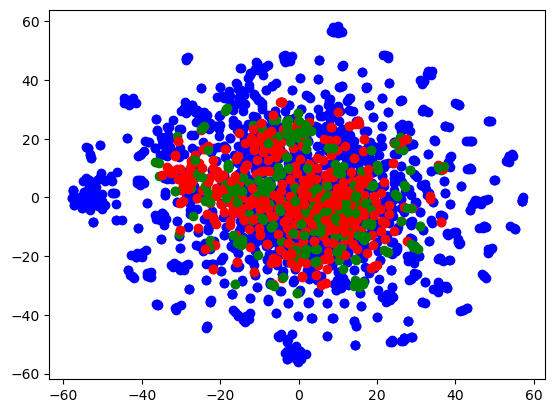

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform X_train to 2D
X_sm_2D = tsne.fit_transform(X_sm)

# Transform X_test to 2D using the same t-SNE transformation
X_test_2D = tsne.fit_transform(X_test)

# Calculate applicability domain
app_domain = in_applicability_domain(X_test, X_sm, threshold=5.0)

# Plot the training data in blue
plt.scatter(X_sm_2D[:, 0], X_sm_2D[:, 1], color='blue')

# Plot the test data in red or green depending on whether they are in or out of the applicability domain
for i in range(len(X_test_2D)):
    if app_domain[i]:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='green')
    else:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='red')

plt.show()


# BUILDING SVM MODEL

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Define the scaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_sm)

# Apply transform to both the training set and the test set
X_sm= scaler.transform(X_sm)
X_test_inliers = scaler.transform(X_test_inliers)  # Make sure X_test is defined and appropriate

# Define the model
svm = SVC(kernel='poly', degree=3, coef0=1.0, probability=True)

# Train the model
svm.fit(X_sm, y_sm)

# Now you can make predictions on your test set and evaluate the model

preds = svm.predict(X_test_inliers)
proba = svm.predict_proba(X_test_inliers)

In [19]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.943089430894309, specificity: 0.864516129032258, precision: 0.8467153284671532, f1: 0.8923076923076922 
mcc: 0.8023204558648138, accuracy: 0.8992805755395683, roc_auc: 0.9460267505900865 
balanced_accuracy: 0.9038027799632835


# TUNING HYPERPARAMETERS

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_sm)
X_test_scaled = scaler.transform(X_test_inliers)

In [18]:
# Initialize the SVM classifier with a polynomial kernel and power parameter
svm = SVC(kernel='poly', coef0=1.0, probability=True)

# Define the parameter grid for the grid search
param_grid = {
    'degree': [2, 3, 4],
    'C': [0.1, 1.0, 10.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_sm)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_



In [21]:
# Initialize the SVM classifier with the best parameters
svm_best = SVC(kernel='poly', coef0=1.0, probability=True)

# Fit the model to the scaled training data
svm_best.fit(X_train_scaled, y_sm)

# Predict the labels of the test set
preds = svm_best.predict(X_test_scaled)

# Get class probabilities using predict_proba
proba = svm_best.predict_proba(X_test_scaled)


In [22]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.943089430894309, specificity: 0.864516129032258, precision: 0.8467153284671532, f1: 0.8923076923076922 
mcc: 0.8023204558648138, accuracy: 0.8992805755395683, roc_auc: 0.9460267505900866 
balanced_accuracy: 0.9038027799632835


# MODEL VALIDATION

In [23]:
import pandas as pd
import numpy as np
dp= pd.read_csv('validation_dataset.csv')
dp

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,486,46903215.0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,71.0,1
1,1700,24980419.0,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0.0,0
2,1309,7567657.0,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,7.0,0
3,1516,2560914.0,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,1.0,0
4,1090,352429.0,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,20.0,0
...,...,...,...,...,...
229,1911,9636483.0,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0.0,0
230,309,16681822.0,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],82.0,1
231,2253,7524261.0,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0.0,0
232,2243,2867068.0,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0


In [24]:
valdata = dp.copy()
colname = ["Canonical_smiles", "Activity_outcome"]
valdata = valdata[colname]

valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata.reset_index(inplace = True, drop = True)
valdata

,Canonical_smiles,Activity_outcome
0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,1
1,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0
2,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,0
3,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,0
4,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,0
...,...,...
229,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0
230,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],1
231,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0
232,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0


In [25]:
smi_list = valdata["Canonical_smiles"].to_list()
molsv = [Chem.MolFromSmiles(smi) for smi in smi_list]

X_val = morgan_fps(molsv)
X_val = X_val[X_val.columns[mask]]
X_val

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_val = valdata["Activity_outcome"]
y_val

0      1
1      0
2      0
3      0
4      0
      ..
229    0
230    1
231    0
232    0
233    1
Name: Activity_outcome, Length: 234, dtype: int64

In [27]:
y_val.unique()

array([1, 0], dtype=int64)

In [28]:
# Define the scaler
#scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_val)

# Apply transform to both the training set and the test set
X_val= scaler.transform(X_val)

# Define the model

In [29]:
y_valpred = svm.predict(X_val)
#y_valproba = svm.predict_proba(X_val)

ValueError: X has 2044 features, but SVC is expecting 2048 features as input.

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_val, y_valpred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
#mcc = matthews_corrcoef(y_val, y_valproba)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
#roc_auc = roc_auc_score(y_val, y_valproba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


In [ ]:
from imblearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ("Variance_threshold", VarianceThreshold(threshold=0)),
    ("Smote", SMOTE(sampling_strategy='minority',random_state = 2)),
    #("Scaling the dataset", StandardScaler()),
    ("model", SVC(kernel='poly', coef0=1.0, probability=True))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [ ]:
X_train

In [ ]:
svm_pipeline.fit(X_train, y_train)

In [ ]:
preds = svm_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, \nbalanced_accuracy: {balanced_accuracy}")


In [38]:
import pickle
with open('svm_pipeline_new.pkl', 'wb') as file:
    # Use pickle to dump the pipeline into the file
    pickle.dump(svm_pipeline, file)

In [39]:
with open('svm_pipeline_new.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [40]:
loaded_pipeline.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [41]:
loaded_pipeline.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,